In [4]:
#단어 수준의 원-핫 인코딩
import numpy as np

samples = ['The car sat on the mat.','The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        print(word)
        if word not in token_index:
            token_index[word] = len(token_index) + 1
            
print(token_index)

max_length = 10

results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values())+1))
for i, sample in enumerate(samples):
    for j,word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i,j,index] = 1.
        
print(results)

The
car
sat
on
the
mat.
The
dog
ate
my
homework.
{'The': 1, 'car': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [6]:
#문자 수준 원-핫 인코딩
import string

samples=['The cat sat on the mat.','The dog ate my homework.']
characters = string.printable
token_index = dict(zip(characters,range(1,len(characters)+1))) #zip은 두 변수를 매핑한 튜플 반환
print(token_index)
max_length = 50
results = np.zeros((len(samples),max_length,max(token_index.values())+1))
for i,sample in enumerate(samples):
    for j,character in enumerate(sample):
        index = token_index.get(character)
        results[i,j,index] = 1.
print(results)

{'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'w': 33, 'x': 34, 'y': 35, 'z': 36, 'A': 37, 'B': 38, 'C': 39, 'D': 40, 'E': 41, 'F': 42, 'G': 43, 'H': 44, 'I': 45, 'J': 46, 'K': 47, 'L': 48, 'M': 49, 'N': 50, 'O': 51, 'P': 52, 'Q': 53, 'R': 54, 'S': 55, 'T': 56, 'U': 57, 'V': 58, 'W': 59, 'X': 60, 'Y': 61, 'Z': 62, '!': 63, '"': 64, '#': 65, '$': 66, '%': 67, '&': 68, "'": 69, '(': 70, ')': 71, '*': 72, '+': 73, ',': 74, '-': 75, '.': 76, '/': 77, ':': 78, ';': 79, '<': 80, '=': 81, '>': 82, '?': 83, '@': 84, '[': 85, '\\': 86, ']': 87, '^': 88, '_': 89, '`': 90, '{': 91, '|': 92, '}': 93, '~': 94, ' ': 95, '\t': 96, '\n': 97, '\r': 98, '\x0b': 99, '\x0c': 100}
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. .

In [50]:
#케라스를 사용한 단어 수준의 원-핫 인코딩
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.','The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000) #빈도가 높은 1000개의 단어만 선택
tokenizer.fit_on_texts(samples) #단어 인덱스 생성

sequences = tokenizer.texts_to_sequences(samples)#문자열을 정수 인덱스의 리스트로 반환
print(sequences)

one_hot_results = tokenizer.texts_to_matrix(samples,mode='binary')#직접 원핫 이진 백터 표현 얻기

print(one_hot_results)
print(len(one_hot_results))

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' %len(word_index))

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
2
9개의 고유한 토큰을 찾았습니다.


In [23]:
#Embeding층의 객체 생성하기
from keras.layers import Embedding
embedding_layer = Embedding(1000,64) 
#Embeding층은 적어도 2개의 매개변수를 받는다. 가능한 토큰의 개수(여기서는 1000으로 단어 인덱스 최댓값+1)와 임베딩 차원(여기서는 64).

In [31]:
#Embedding 층에 사용할 imdb데이터 로드
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 #빈도가 가장 높은 단어 1만개
maxlen = 20 #사용할 문장의 길이(가장 빈번한 max_features개의 단어만 사용)

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)
#pad_sequences는 (samples,maxlen)크기의 2d 정수 텐서로 반환
print(len(x_test[0])) #한 행의 길이는 20
print(len(x_test)) #imdb는 테스트와 트레인 데이터가 각각 25000개
print(x_test)

20
25000
[[ 286  170    8 ...   14    6  717]
 [  10   10  472 ...  125    4 3077]
 [  34    2   45 ...    9   57  975]
 ...
 [ 226   20  272 ...   21  846 5518]
 [  55  117  212 ... 2302    7  470]
 [  19   14   20 ...   34 2005 2643]]


In [22]:
#imdb 데이터에 embedding 층과 분류기 사용하기
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000,8,input_length=maxlen)) #maxlen = 20
#나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embeding 층에 input_length를 지정한다. 
#first param:단어 집합의 크기
#second param:임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기 
#input_length:입력 시퀀스의 길이

model.add(Flatten())#3d 임베딩 텐서를(samples,maxlen*8)크기의 2d 텐서로 펼친다.

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
model.summary()

history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
#   ______________10,000_____________
#20|_________________________________|
#                   ⇣
#             Embedding Layer
#                 __8__
#              20|_____| cf.8은 max_length이다.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten_3 (Flatten)         (None, 160)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 10/625 [..............................] - ETA: 7s - loss: 0.6917 - acc: 0.4781 

2022-05-28 15:23:41.330461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


622/625 [============================>.] - ETA: 0s - loss: 0.6781 - acc: 0.5957

2022-05-28 15:23:46.492125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 6s 9ms/step - loss: 0.6779 - acc: 0.5960 - val_loss: 0.6393 - val_acc: 0.6820
Epoch 2/10
625/625 [==============================] - 5s 9ms/step - loss: 0.5621 - acc: 0.7451 - val_loss: 0.5359 - val_acc: 0.7258
Epoch 3/10
625/625 [==============================] - 5s 9ms/step - loss: 0.4703 - acc: 0.7837 - val_loss: 0.5045 - val_acc: 0.7418
Epoch 4/10
625/625 [==============================] - 5s 9ms/step - loss: 0.4254 - acc: 0.8079 - val_loss: 0.4970 - val_acc: 0.7492
Epoch 5/10
625/625 [==============================] - 6s 9ms/step - loss: 0.3956 - acc: 0.8247 - val_loss: 0.4961 - val_acc: 0.7542
Epoch 6/10
625/625 [==============================] - 5s 9ms/step - loss: 0.3715 - acc: 0.8382 - val_loss: 0.5002 - val_acc: 0.7544
Epoch 7/10
625/625 [==============================] - 5s 9ms/step - loss: 0.3504 - acc: 0.8509 - val_loss: 0.5048 - val_acc: 0.7562
Epoch 8/10
625/625 [==============================] - 6s 9ms/step - loss: 0.3309 - acc:

In [41]:
#####################################################
#imdb 원본 데이터 전처리하기
import os
imdb_dir = '/Users/jw1010110/AI/aclImdb'
train_dir = os.path.join(imdb_dir,'train')

labels=[]
texts = []

for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name,fname),encoding="utf-8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
print(texts[0])
print(len(labels))
print(labels)

Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.
25000
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [42]:
#imdb 원본 데이터의 텍스트를 토큰화
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 #100개 단어 이후는 버림
training_samples = 200 #훈련 샘플은 200개
validation_samples = 10000 #검증샘플은 1만개
max_words = 10000 #데이터셋에서 가장 빈도가 높은 1만개만 사용

tokenizer = Tokenizer(num_words=max_words)#가장 빈도 높은 단어 1만개만 사용하도록 Tokenizer 객체 생성
tokenizer.fit_on_sequences(texts)#단어 인덱스를 생성
sequences = tokenizer.texts_to_sequences(texts)#문자열을 정수의 인덱스 리스트로 변환

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' %len(word_index))

data = pad_sequences(sequences,maxlen=maxlen)
labels = np.asanyarray(labels)
print('데이터 텐서의 크기:',data.shape)
print('레이블 텐서의 크기:',labels.shape)

indicess = np.arange(data.shape[0])
np.random.shuffle(indicess)
data = data[indicess]
labels = labels[indicess]

x_train = data[:training_samples] #사전에 훈련된 단어 임베딩은 훈련 데이터가 부족할 때 사용하면 유용하다.
y_train = labels[:training_samples] #따라서 200개로 제한하고 훈련한다.
x_val = data[training_samples: training_samples + validation_samples] #검증샘플은 1만개 사용
y_val = labels[training_samples: training_samples + validation_samples]

0개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


In [51]:
#GloVe 단어 임베딩 파일 파싱
glove_dir = '/Users/jw1010110/AI/'

embeddings_index = {}
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asanyarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('%s개의 단어 백터를 찾았습니다.' %len(embeddings_index))

400000개의 단어 백터를 찾았습니다.


In [52]:
#GloVe 단어 임베딩 행렬 준비

embedding_dim = 100
embedding_matrix = np.zeros((max_words,embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [53]:
#모델 정의

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 10000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                320032    
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [54]:
#사전 훈련된 단어 임베딩을 Embedding 층에 로드하기
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [55]:
#훈련과 평가하기

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/10


2022-05-28 22:04:36.077381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.5100

2022-05-28 22:04:36.904675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 2s 187ms/step - loss: 0.6932 - acc: 0.5100 - val_loss: 0.6932 - val_acc: 0.4943
Epoch 2/10
7/7 [==============================] - 1s 139ms/step - loss: 0.6931 - acc: 0.5100 - val_loss: 0.6932 - val_acc: 0.4943
Epoch 3/10
7/7 [==============================] - 1s 136ms/step - loss: 0.6931 - acc: 0.5100 - val_loss: 0.6932 - val_acc: 0.4943
Epoch 4/10
7/7 [==============================] - 1s 136ms/step - loss: 0.6931 - acc: 0.5100 - val_loss: 0.6932 - val_acc: 0.4943
Epoch 5/10
7/7 [==============================] - 1s 136ms/step - loss: 0.6931 - acc: 0.5100 - val_loss: 0.6932 - val_acc: 0.4943
Epoch 6/10
7/7 [==============================] - 1s 136ms/step - loss: 0.6931 - acc: 0.5100 - val_loss: 0.6932 - val_acc: 0.4943
Epoch 7/10
7/7 [==============================] - 1s 141ms/step - loss: 0.6931 - acc: 0.5100 - val_loss: 0.6932 - val_acc: 0.4943
Epoch 8/10
7/7 [==============================] - 1s 142ms/step - loss: 0.6931 - acc: 0.5100 - val_lo

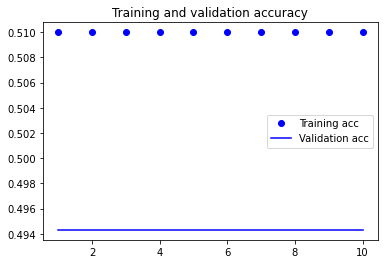

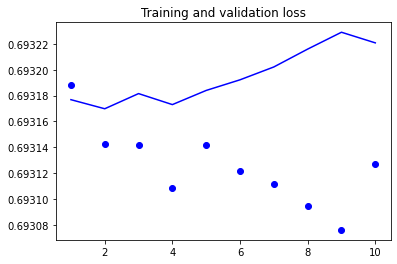

In [56]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('Training and validation loss')

plt.show()